# Determining Red Wine Quality using Machine Learning


## Importing Libraries

In [53]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns  
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler      

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score    

In [54]:
df= pd.read_csv('wine.csv')

In [55]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [56]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

## Data Analysis

In [57]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [59]:
df.isnull().sum()  ## checking null values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [60]:
df.shape

(1599, 12)

### Plotting Histograms

In [61]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [62]:
cols= ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

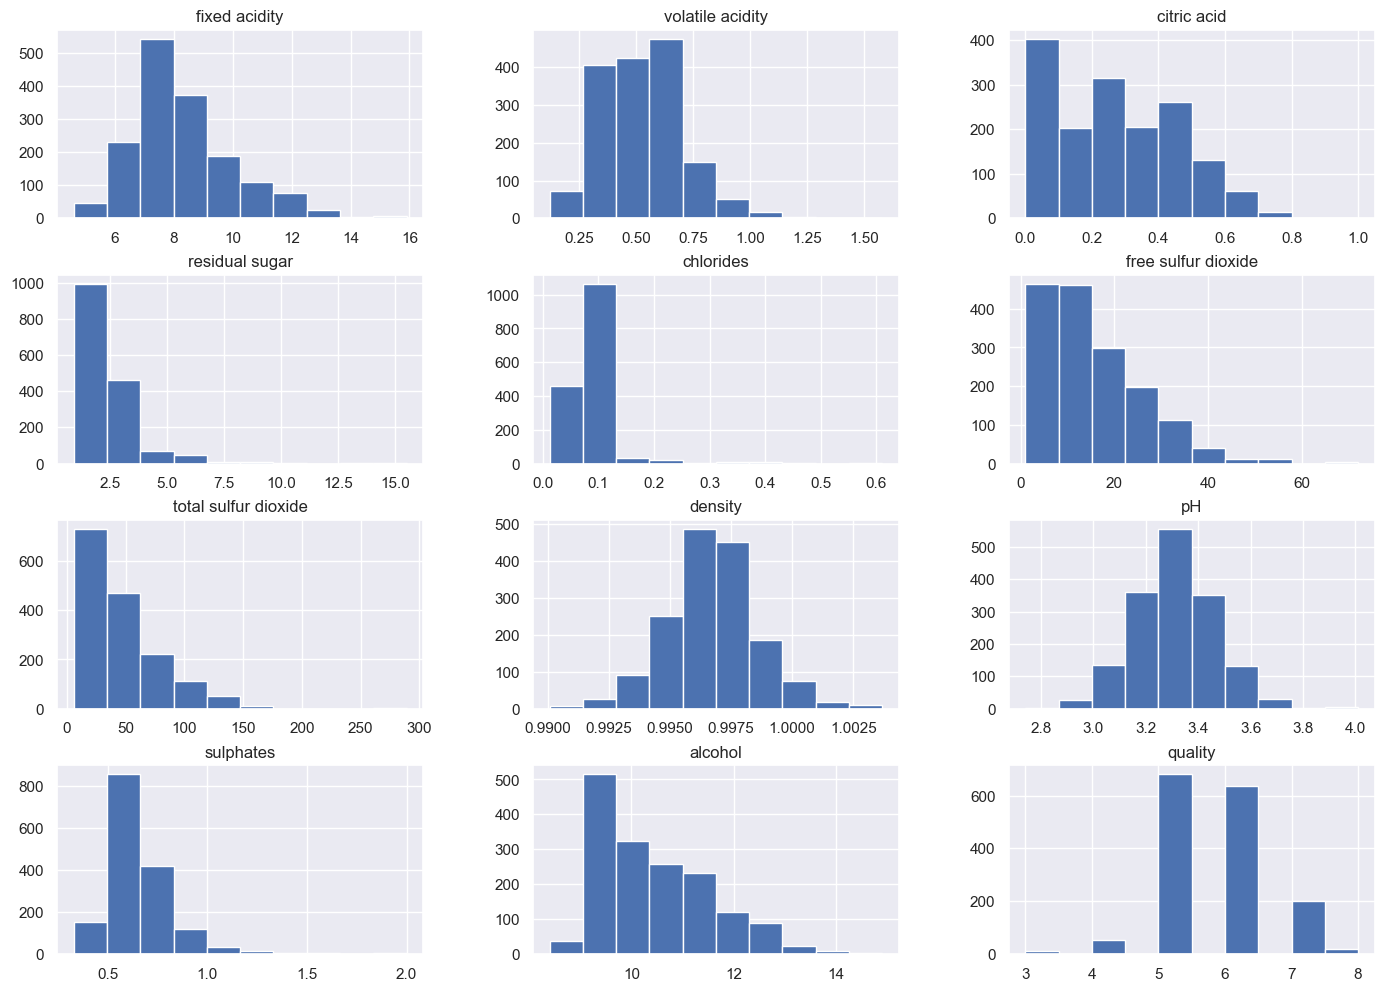

In [63]:
df.hist(figsize=(17,12))
plt.show()

### Plotting Box Plots

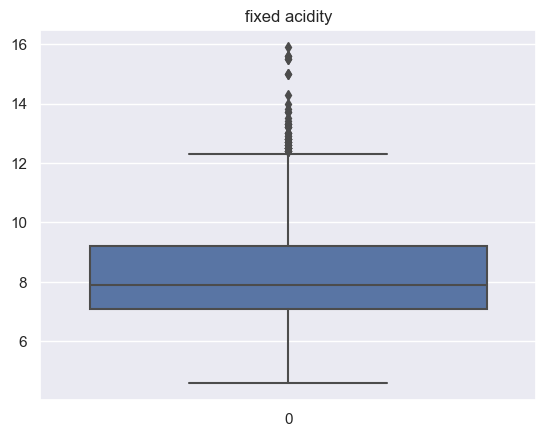

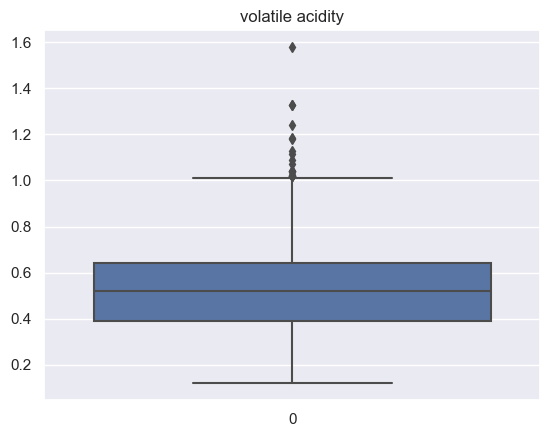

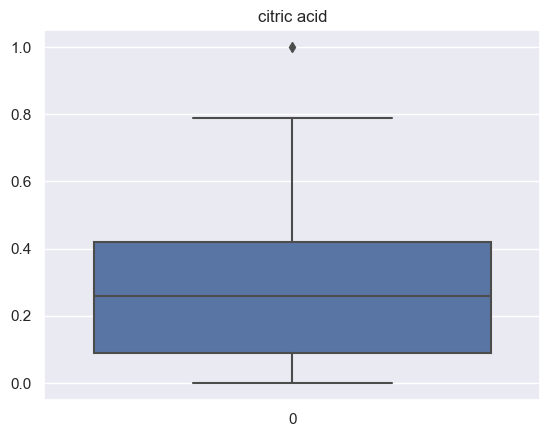

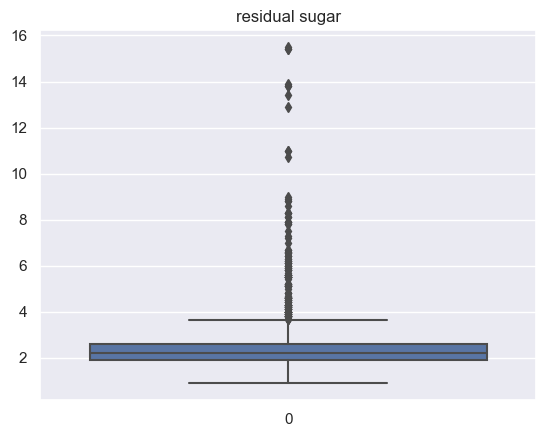

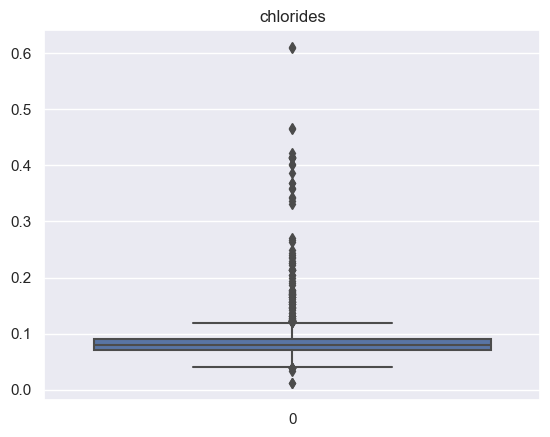

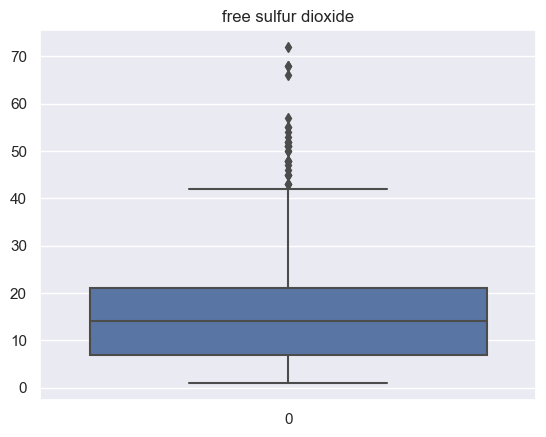

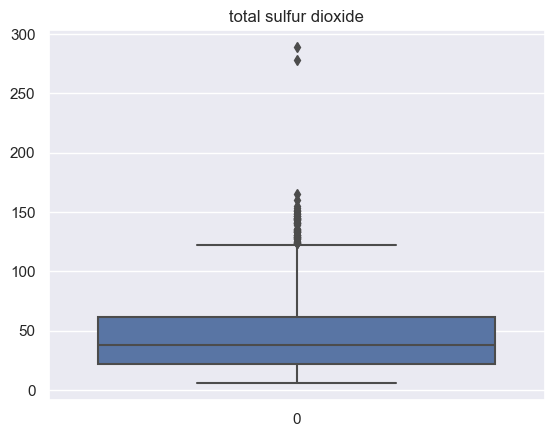

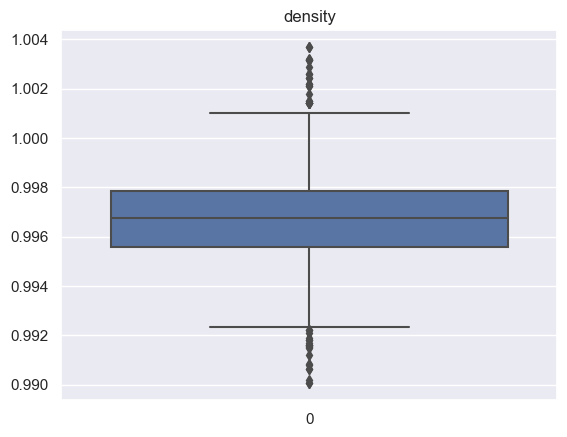

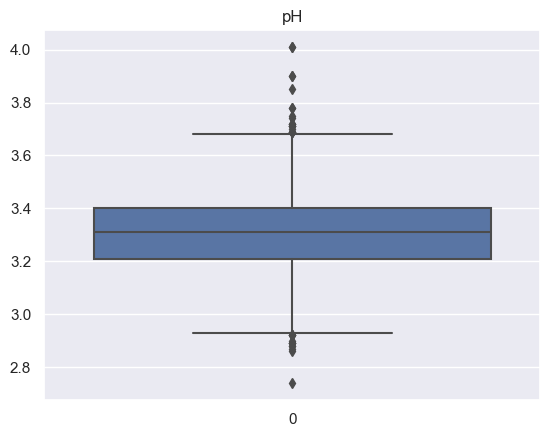

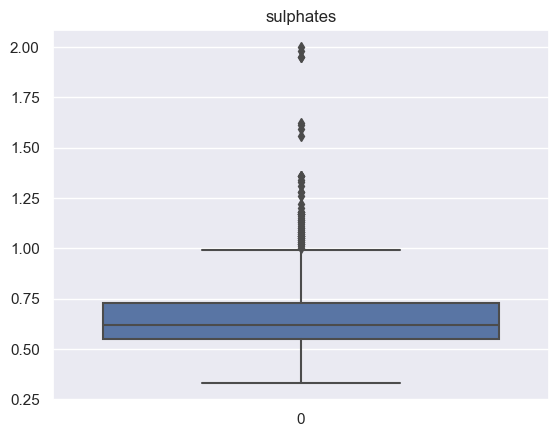

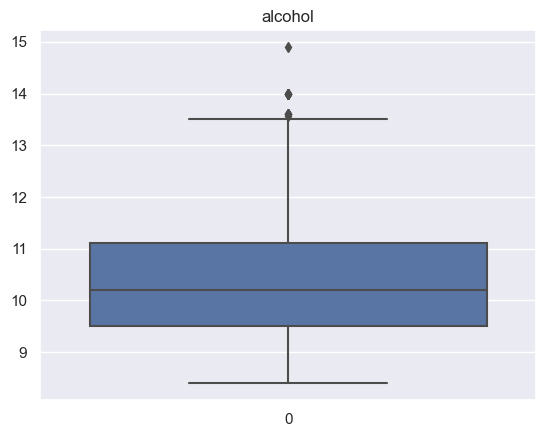

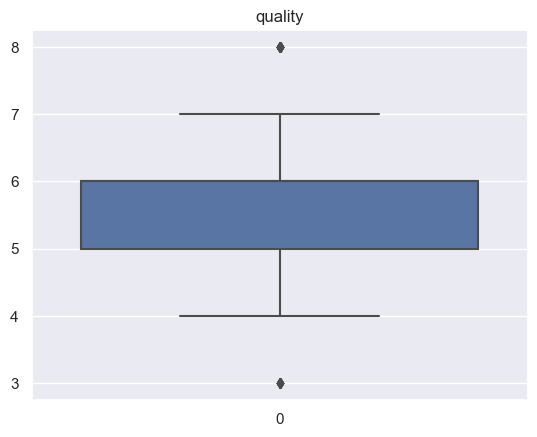

In [64]:
for col in cols:
    plt.figure()
    sns.boxplot(df[col])
    plt.title(col)

### Plotting scatter plots

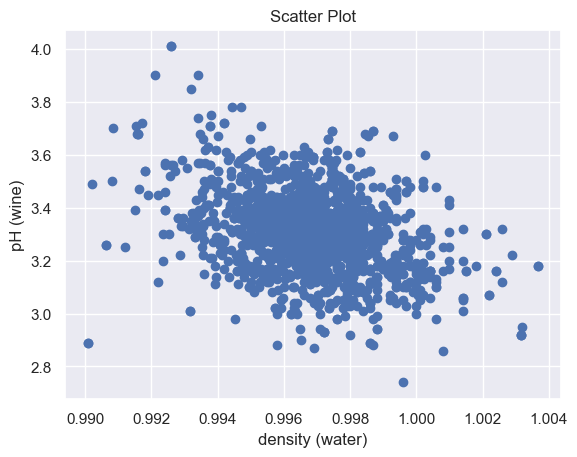

In [65]:
d = df["density"]
ph = df["pH"]

plt.scatter(d, ph)
plt.title("Scatter Plot")
plt.xlabel("density (water)")
plt.ylabel("pH (wine)")
plt.show()

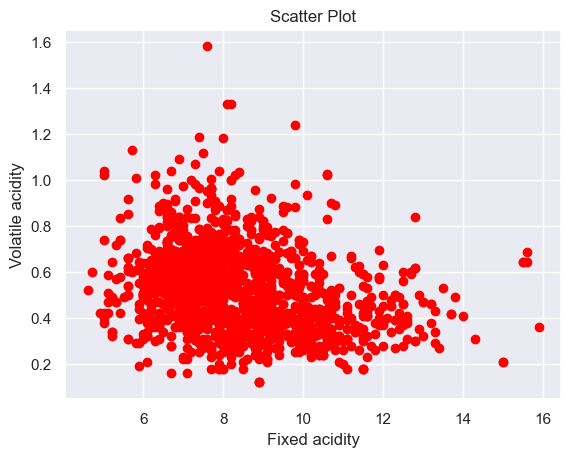

In [66]:
fa = df["fixed acidity"]
va = df["volatile acidity"]

plt.scatter(fa, va,color = 'red')
plt.title("Scatter Plot")
plt.xlabel("Fixed acidity")
plt.ylabel("Volatile acidity")
plt.show()

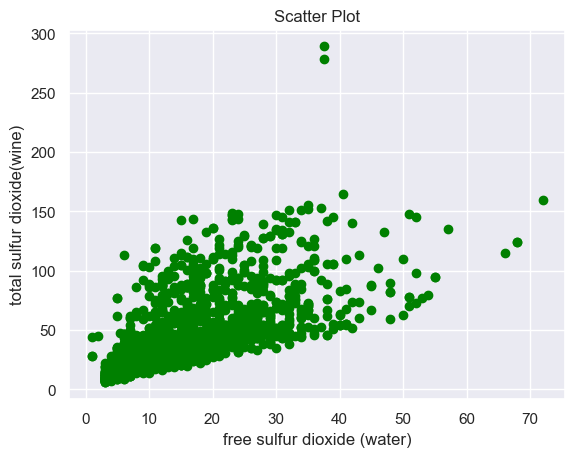

In [67]:
fsd = df["free sulfur dioxide"]
tsd = df["total sulfur dioxide"]

plt.scatter(fsd, tsd,color = 'green')
plt.title("Scatter Plot")
plt.xlabel("free sulfur dioxide (water)")
plt.ylabel("total sulfur dioxide(wine)")
plt.show()

In [68]:
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

<Axes: >

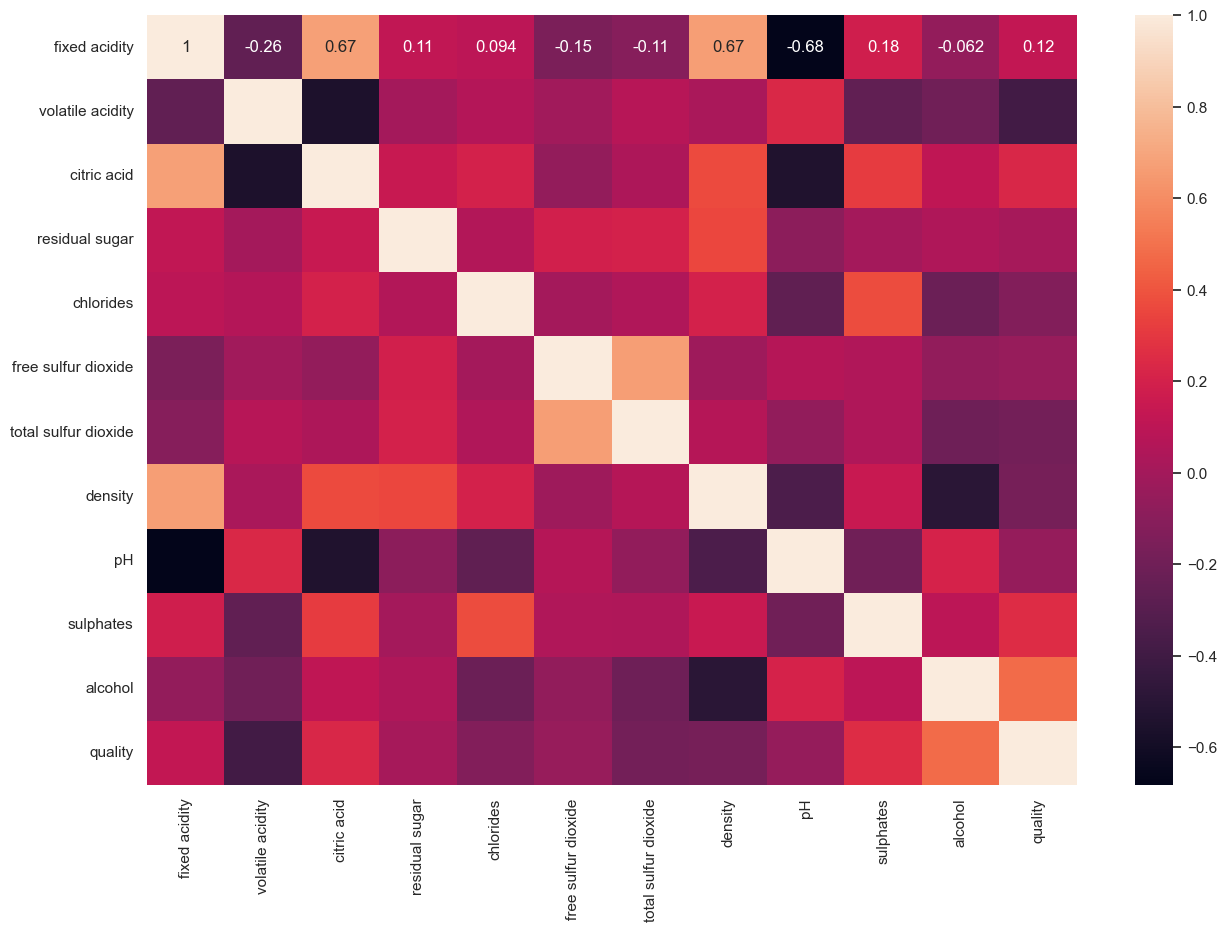

In [69]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True)

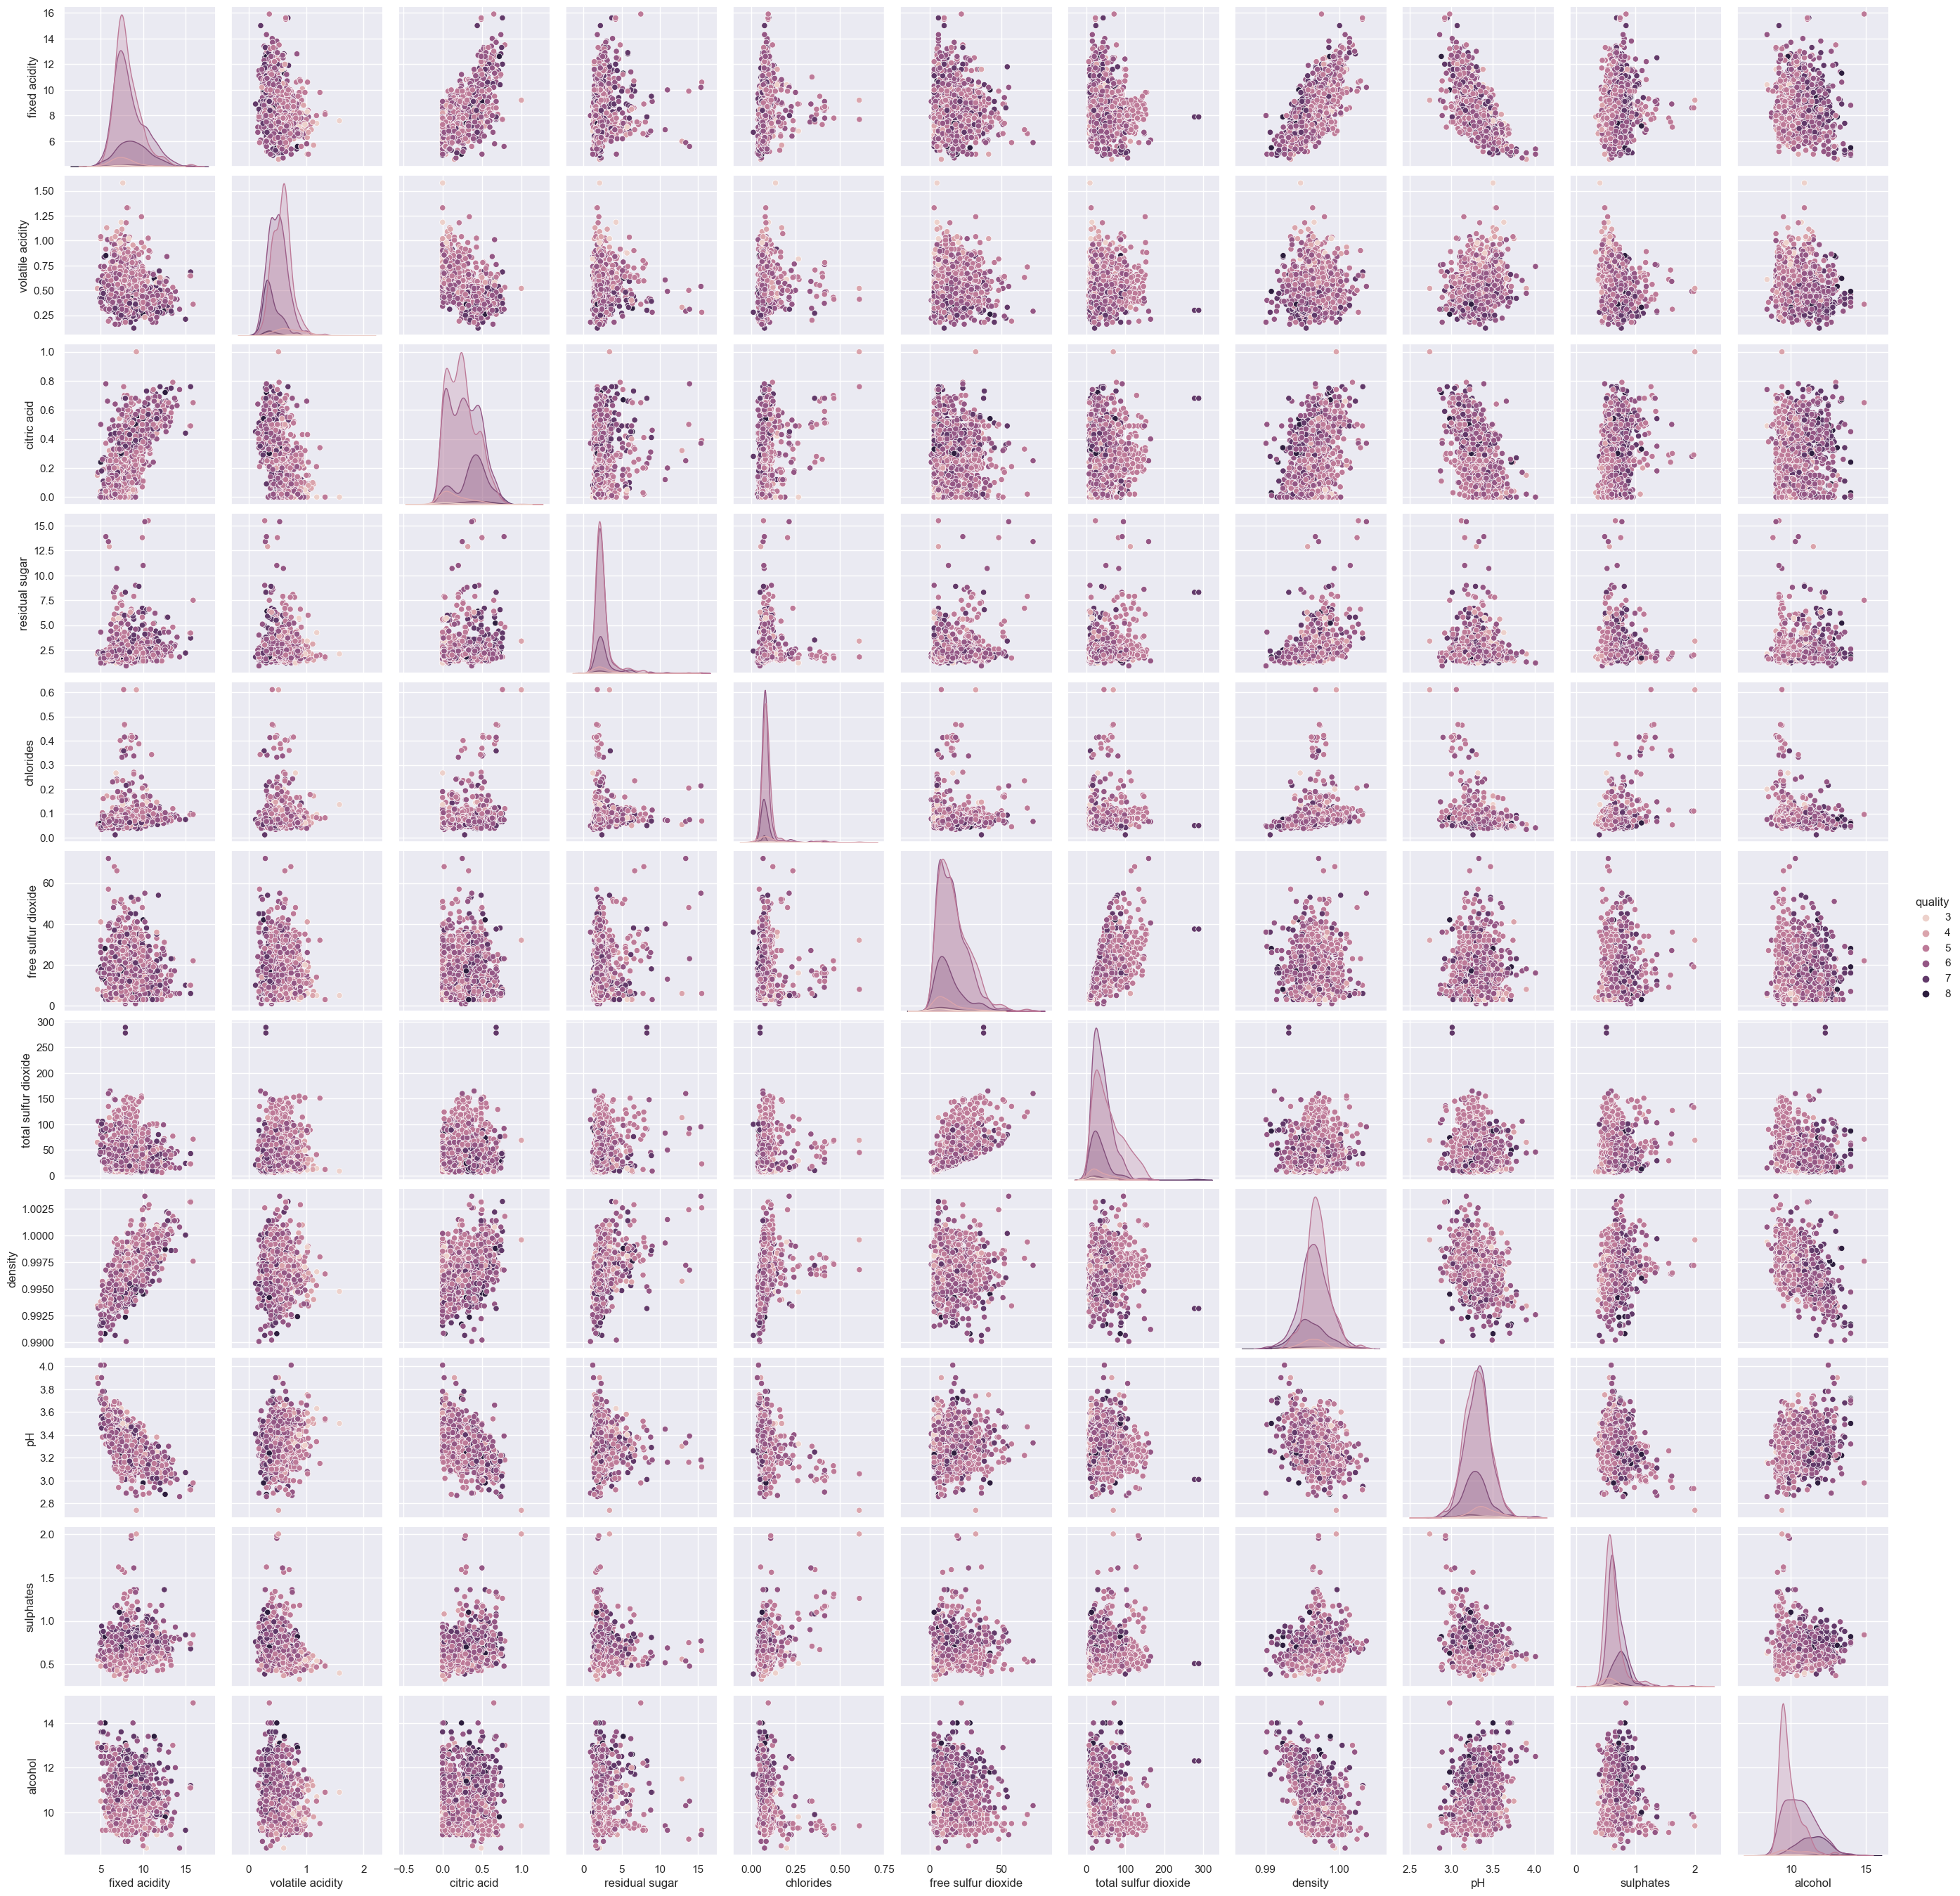

In [70]:
sns.pairplot(df,hue='quality')

<b> Let us see the range of quality of wine </b>

In [71]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

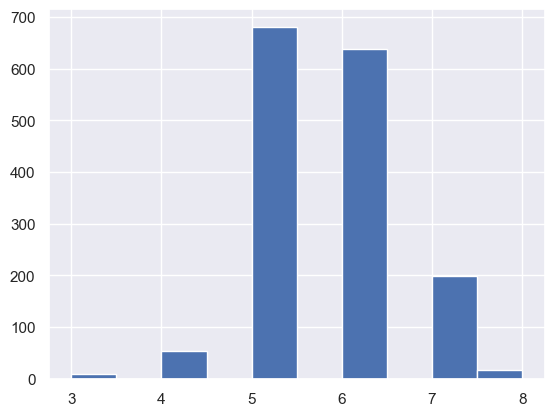

In [72]:
plt.hist(df['quality'])

## Data Preprocessing

In [73]:
cols= ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

x = df[cols] ## independent var
y = df['quality']  ## dependent var

### Splitting the data

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20 , random_state=42,shuffle=True)

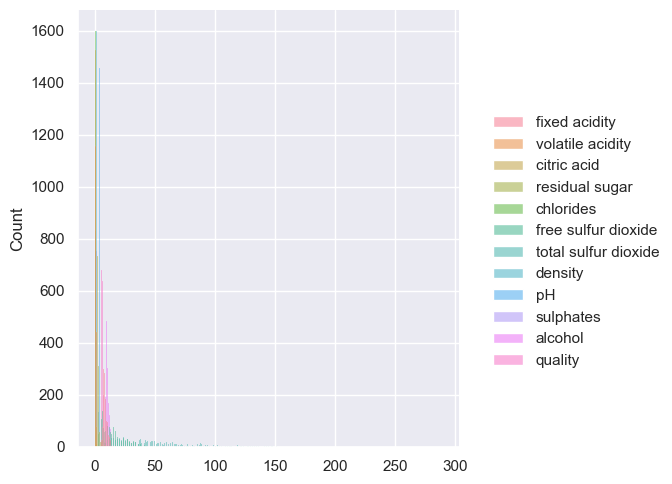

In [75]:
sns.displot(df)

### Scaling the data using Standard Scaler

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
ss= StandardScaler()

In [78]:
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

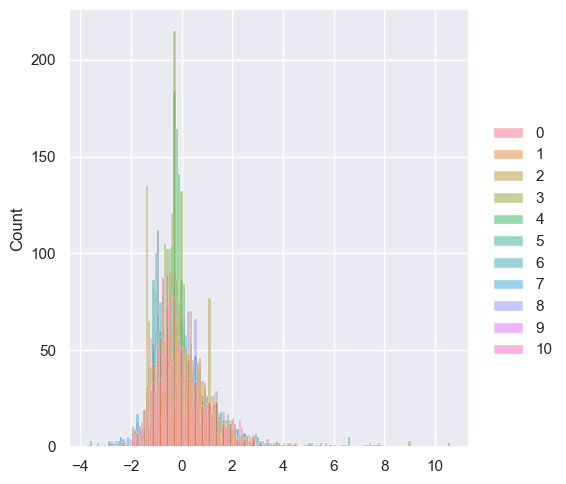

In [79]:
sns.displot(x_train)

In [80]:
x_test.shape

(320, 11)

## Prediction using K Nearest Neighbour algorithm

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [83]:
pred=knn.predict(x_test)
pred

array([5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 7, 6, 6, 5, 6, 7, 5, 5, 7, 5, 4, 5,
       5, 6, 5, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 7, 5,
       6, 6, 7, 6, 5, 5, 5, 5, 6, 7, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 7, 5,
       6, 6, 7, 5, 6, 5, 6, 6, 6, 5, 7, 5, 6, 7, 5, 7, 5, 5, 6, 6, 5, 6,
       7, 6, 6, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5,
       6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 5,
       5, 6, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 7, 5, 5, 6, 6, 5, 6,
       6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 7, 5, 5, 6,
       6, 5, 5, 5, 5, 7, 6, 7, 5, 6, 6, 6, 7, 5, 6, 6, 6, 6, 5, 6, 5, 6,
       5, 6, 6, 5, 5, 5, 7, 6, 5, 5, 5, 6, 7, 5, 6, 6, 6, 6, 6, 5, 6, 6,
       5, 6, 7, 6, 6, 5, 5, 7, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 7, 7, 6, 5, 7,
       6, 7, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 5, 7, 6, 5, 6, 5, 6,
       5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 5, 7, 6, 7, 6,

In [84]:
y_test

803     6
124     5
350     6
682     5
1326    6
       ..
1259    6
1295    5
1155    5
963     6
704     4
Name: quality, Length: 320, dtype: int64

In [85]:
matrix = confusion_matrix(y_test,pred)
matrix

array([[ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  5,  5,  0,  0],
       [ 0,  1, 89, 40,  0,  0],
       [ 0,  0, 39, 82, 11,  0],
       [ 0,  0,  3, 22, 17,  0],
       [ 0,  0,  0,  3,  2,  0]], dtype=int64)

<b> Let us find out the accuracy </b>

In [86]:
print('Accuracy using KNN is : ',100*accuracy_score(y_test,pred))

Accuracy using KNN is :  58.75


## Prediction using SVM Classifier

In this we will classify if the wine is good or bad so we will create a column which will state that if a wine quality is greater than 5 then it is a good quality wine else it is not

In [87]:
y=df['quality']>5
y  ## dependent var

0       False
1       False
2       False
3        True
4       False
        ...  
1594    False
1595     True
1596     True
1597    False
1598     True
Name: quality, Length: 1599, dtype: bool

In [88]:
y.value_counts()

quality
True     855
False    744
Name: count, dtype: int64

In [89]:
x=df.iloc[:,:-1]

x   ## independent var

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
1594     10.5  
1595     11.2  
1596     11.0  
1597     10.2  
1598     11.0  

[1599 rows x 11 columns]

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25) ##splitting the data

In [91]:
scaled_x_train=ss.fit_transform(x_train)

scaled_x_train

array([[ 0.03570115,  1.17013908, -0.82797173, ..., -0.77068411,
         0.91195248, -0.75660071],
       [-0.42519441, -0.54734879,  0.09751438, ...,  0.59078753,
        -0.10608706, -0.85048089],
       [ 0.03570115,  0.16145573, -1.18788299, ..., -0.57618817,
        -1.2372421 , -0.75660071],
       ...,
       [-0.25235857,  0.21597915,  0.20034617, ..., -0.12236428,
         0.1767017 , -0.85048089],
       [ 2.68585058, -0.32925509,  1.12583228, ..., -0.0575323 ,
         0.12014395,  2.15368509],
       [ 0.84226836,  2.45143956,  0.25176207, ..., -0.38169222,
        -1.01101109, -0.94436108]])

In [92]:
scaled_x_test=ss.transform(x_test)

scaled_x_test

array([[ 1.41838781, -0.32925509,  0.81733691, ..., -0.90034808,
         0.57260597,  0.36996154],
       [-0.13713469,  1.57906477, -1.39354657, ...,  0.3314596 ,
        -0.72822233, -0.75660071],
       [ 0.43898476, -1.31067673,  0.30317796, ..., -0.31686023,
         1.02506798,  1.21488322],
       ...,
       [-0.59803024, -0.90175105,  1.12583228, ...,  0.3314596 ,
         0.68572147,  0.55772191],
       [ 4.18376113,  0.84299854,  2.51406145, ..., -2.3266517 ,
         0.12014395,  0.74548229],
       [-0.42519441, -0.54734879,  0.09751438, ...,  0.59078753,
        -0.10608706, -0.85048089]])

In [93]:
x_test.shape

(400, 11)

### Performing Classification

In [94]:
from sklearn.svm import SVC

svc_clf = SVC(C=1.0, 
              kernel='rbf', 
              degree=3, 
              gamma='auto', 
              probability=False, 
              tol=0.001, cache_size=200, 
              verbose=False, max_iter=-1, 
              decision_function_shape='ovr', 
              random_state=None)

svc_clf.fit(scaled_x_train,y_train)

SVC(gamma='auto')

In [95]:
pred1=svc_clf.predict(scaled_x_test)

In [96]:
pred1

array([False, False,  True, False,  True, False, False,  True, False,
       False, False,  True,  True, False,  True,  True,  True, False,
        True, False,  True, False,  True,  True, False, False, False,
        True, False,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
       False, False,  True, False,  True, False, False,  True,  True,
        True, False, False, False,  True,  True, False,  True,  True,
        True, False,  True, False, False,  True,  True, False, False,
       False, False,  True,  True, False, False, False,  True,  True,
       False,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False,  True, False,  True, False,  True,
        True,  True,  True,  True,  True, False, False, False, False,
        True, False,  True, False,  True, False,  True,  True,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
       False, False,

<b> Checking Accuracy </b>

In [97]:
print(confusion_matrix(y_test,pred1))

[[130  55]
 [ 45 170]]


In [98]:
print("Accuracy using SVM is : ",100*accuracy_score(y_test,pred1))

Accuracy using SVM is :  75.0


<b> Plotting a confusion matrix </b>

In [99]:
matrix= confusion_matrix(y_test,pred1)

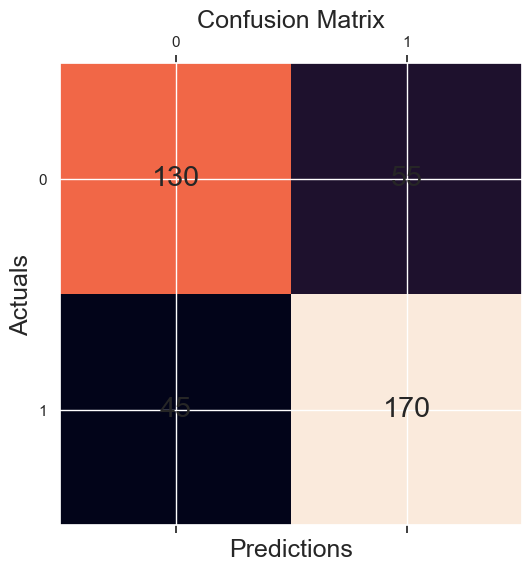

In [100]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(matrix )
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i,s=matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()